In [1]:
DATASET='rec.mu2e.CRV_wideband_cosmics.CRVWB-000-003-000.root'

from mu2etools import *
from mu2etools import wideband
from scipy import stats

runlist=[1433,1435,1436,1437,1438,1439,1440,1441,1442]
bias = np.array([53.5, 54, 54.5, 55, 55.5, 56, 56.5, 57, 57.5])

In [2]:
processor = wideband.DataProcessor(usexroot=True, fixtimes=False, runlist=runlist, userunlist=True, remove=False)
arr, arSpills = processor.getData(DATASET) # get akward array for "run" tree

In [3]:
list_febID = arr['febID'].to_list()
FEBID = min(list_febID, key=lambda x: len(x))

NFEBS=len(FEBID)
print("Dataset: %s"%DATASET)
print("Number of FEBs: %d"%NFEBS)
print("List of FEBs: %s"%FEBID)

Dataset: rec.mu2e.CRV_wideband_cosmics.CRVWB-000-003-000.root
Number of FEBs: 1
List of FEBs: [22]


In [4]:
if not np.array_equal(np.array(runlist), arr['runNumber'].to_numpy()):
    print("Input run list order and data do not match")

In [5]:
#Mask channels which were not calibrated
useRaw = True
var='calibConstantsTemperatureCorrected'
if useRaw:
    var = 'calibConstants'
    
arSPE = ak.mask(arr[var], arr[var]>0).to_numpy()

[295.664 357.455 422.312 486.554 549.481 611.386 672.081 734.377]


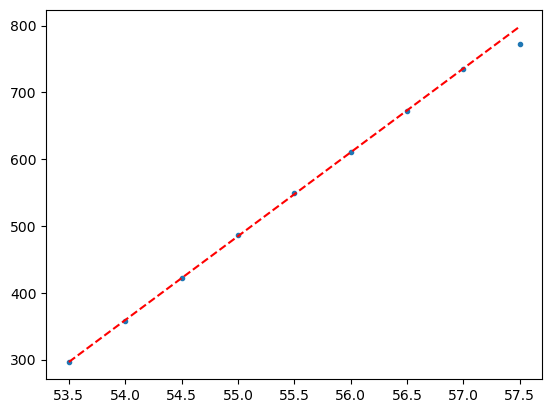

In [7]:
#Plot one channel
chan=44
x=bias
y=arSPE[:, 0, chan]
mask = ~np.isnan(y)
x=x[mask]
y=y[mask]
print(y[:-1])
plt.plot(x, y, '.');
slope, intercept, r_value, p_value, std_err = stats.linregress(x[:-1], y[:-1])
plt.plot(x, slope * x + intercept, '--', color = 'red');


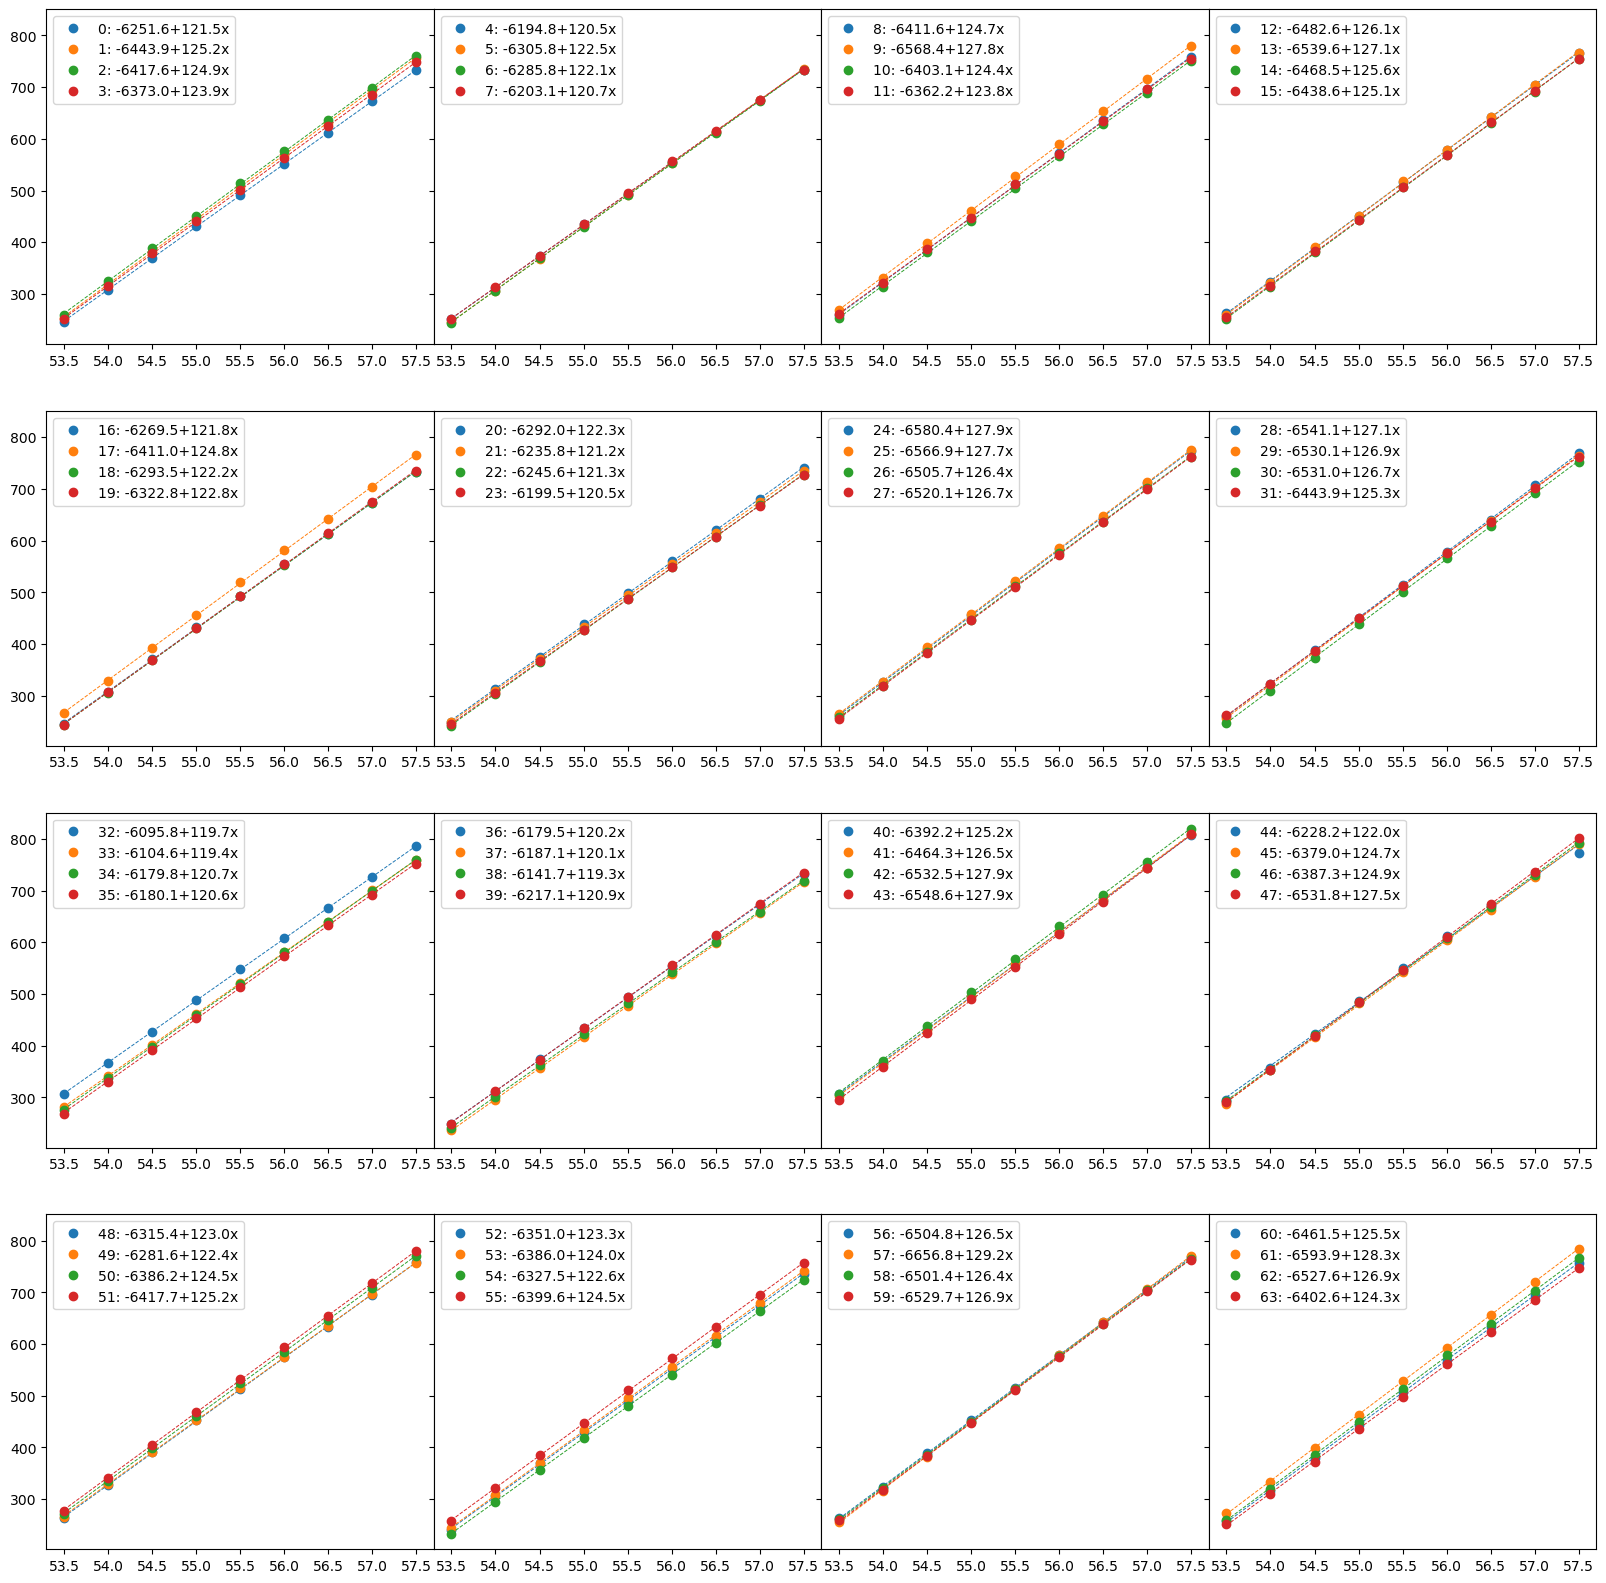

In [8]:
df = pd.DataFrame(columns=['feb', 'chan', 'slope', 'intercept', 'r_value', 'p_value', 'std_err', "Vbd"])
for feb in range(NFEBS):
    
    fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20, 20), sharey=True)
    plt.subplots_adjust(wspace=0)

    for hdmi, ax in enumerate(axs.flatten()):

        for inhdmi_chan in range(4):
            chan = hdmi*4+inhdmi_chan
            x=bias
            y=arSPE[:, feb, chan]
            mask = ~np.isnan(y)
            x=x[mask]
            y=y[mask]

            if y.size==0:
                print("Bad channel: %d, %d"%(feb,chan))
                continue

            slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
            ratio = - intercept / slope
            ratio_stderr = ratio * np.sqrt((std_err / slope)**2)

            new_row = {'feb': feb, 'chan': chan, 'slope': slope, 'intercept': intercept,
                       'r_value': r_value, 'p_value': p_value, 'std_err': ratio_stderr, 'Vbd': ratio}
            df.loc[len(df)] = new_row

            markers = ax.plot(x, y, 'o', label='%d: %.1f+%.1fx'%(chan, intercept, slope))
            ax.plot(x, slope * x + intercept, '--', color = markers[0].get_color(), linewidth=0.7)
            ax.legend()

Text(0, 0.5, 'slope')

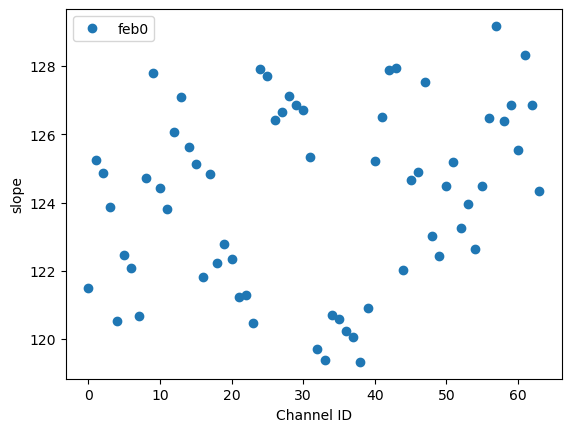

In [14]:
plt.plot(df.query('feb==0')['chan'], df.query('feb==0')['slope'], 'o', label='feb0')
plt.legend();
plt.xlabel("Channel ID")
plt.ylabel("slope")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


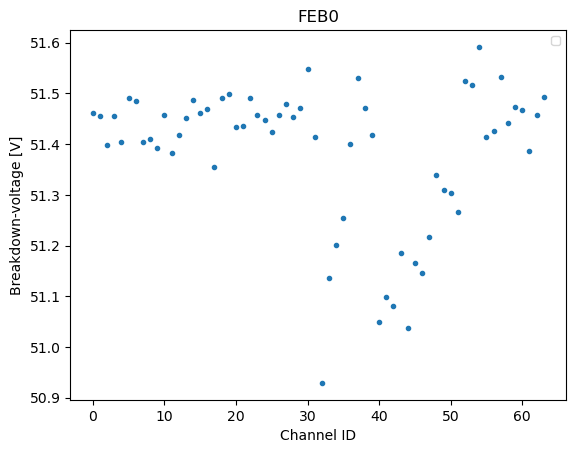

In [15]:
for feb in range(NFEBS):
    plt.title("FEB%d"%feb)
    plt.plot(df.query("feb==%d"%feb)['chan'], df.query("feb==%d"%feb)['Vbd'], '.')
    plt.xlabel("Channel ID")
    plt.ylabel("Breakdown-voltage [V]")

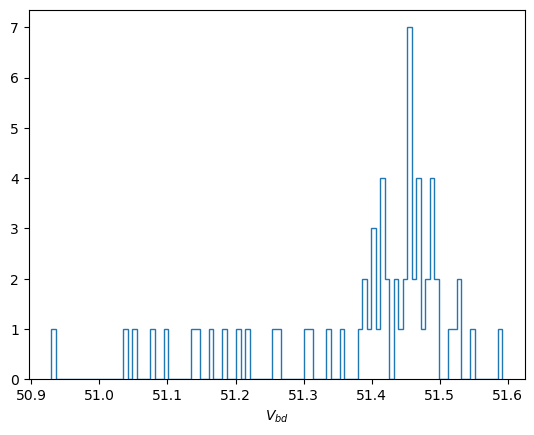

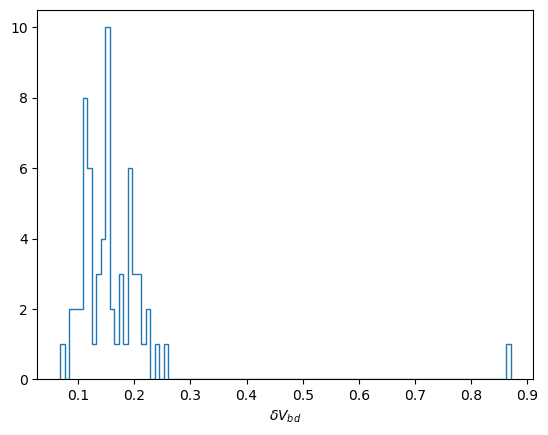

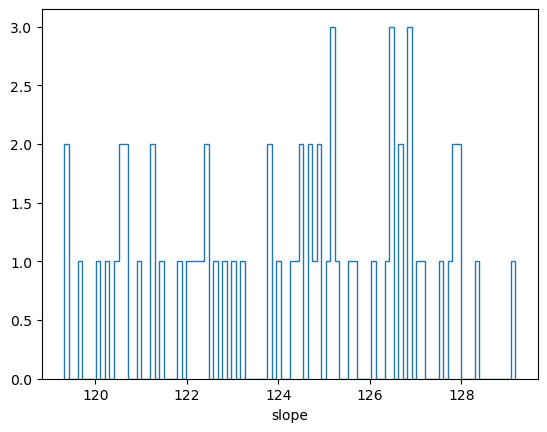

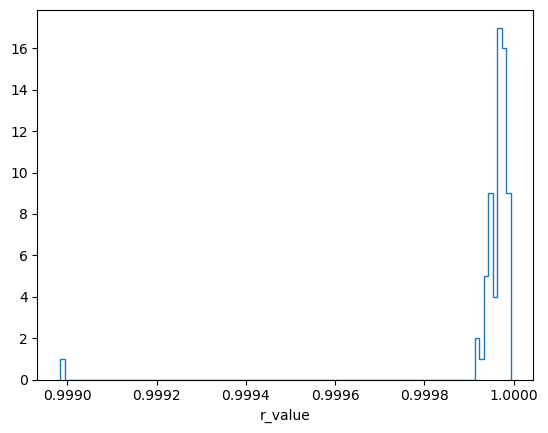

In [11]:
plt.hist(df['Vbd'], bins=100, histtype='step');
plt.xlabel('$V_{bd}$');

plt.figure()
plt.hist(df['std_err'], bins=100, histtype='step');
plt.xlabel('std_err');
plt.xlabel('$\delta V_{bd}$')

plt.figure()
plt.hist(df['slope'], bins=100, histtype='step');
plt.xlabel('slope');

plt.figure()
plt.hist(df['r_value'], bins=100, histtype='step');
plt.xlabel('r_value');

In [12]:
pd.set_option('display.max_rows', None)
df

,feb,chan,slope,intercept,r_value,p_value,std_err,Vbd
0,0,0,121.480573,-6251.615286,0.999983,6.531117e-17,0.113078,51.461852
1,0,1,125.234564,-6443.916110,0.999980,1.220840e-16,0.123632,51.454773
2,0,2,124.861470,-6417.640782,0.999949,3.057176e-15,0.195647,51.398088
3,0,3,123.855997,-6372.963506,0.999968,6.019919e-16,0.155283,51.454622
4,0,4,120.511333,-6194.773860,0.999984,5.151102e-17,0.109185,51.404077
5,0,5,122.467263,-6305.840311,0.999983,6.971855e-17,0.114201,51.490008
6,0,6,122.091268,-6285.786926,0.999970,4.854367e-16,0.150669,51.484328
7,0,7,120.673307,-6203.114862,0.999966,7.333724e-16,0.159569,51.404200
8,0,8,124.714830,-6411.630496,0.999956,1.788369e-15,0.181262,51.410330
9,0,9,127.810136,-6568.368732,0.999946,3.848666e-15,0.202164,51.391611
